In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

def check_similarity(point1, point2):
    """
    Returns True if two data points belong to the same K-means cluster.
    """
    p1 = scaler.transform([point1])
    p2 = scaler.transform([point2])

    cluster1 = kmeans.predict(p1)[0]
    cluster2 = kmeans.predict(p2)[0]

    return cluster1 == cluster2, cluster1, cluster2

sample1 = X[0]
sample2 = X[50]

is_similar, c1, c2 = check_similarity(sample1, sample2)

print("Sample 1 cluster:", c1)
print("Sample 2 cluster:", c2)
print("Are they similar (same cluster)?", is_similar)

print("\nCluster Centers (scaled):\n", kmeans.cluster_centers_)

Sample 1 cluster: 1
Sample 2 cluster: 0
Are they similar (same cluster)? False

Cluster Centers (scaled):
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


Best number of clusters based on Silhouette Score: 2

Final Silhouette Score: 0.5817500491982808

Similarity Result:
same_cluster: False
cluster1: 1
cluster2: 0
distance1_to_center: 0.21295823929662203
distance2_to_center: 1.4303972766132755


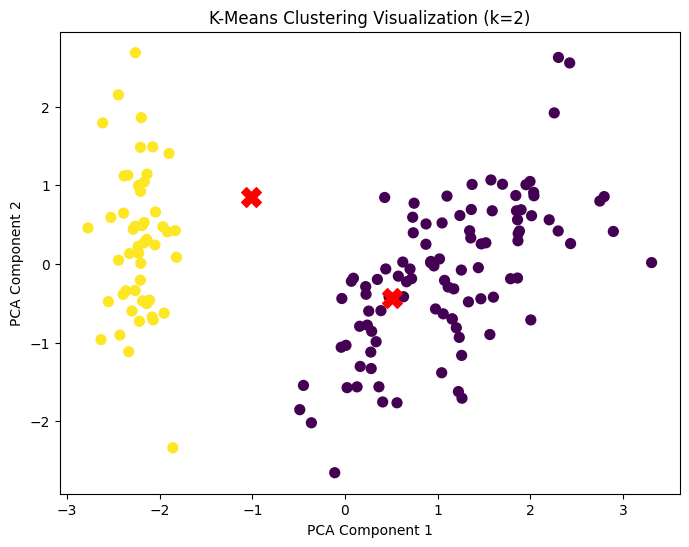

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = {}
for k in range(2, 8):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    silhouette_scores[k] = silhouette_score(X_scaled, labels_temp)

best_k = max(silhouette_scores, key=silhouette_scores.get)
print("Best number of clusters based on Silhouette Score:", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print("\nFinal Silhouette Score:", silhouette_score(X_scaled, labels))

def similarity(point1, point2):
    """
    Determines similarity based on:
    - Same cluster assignment
    - Distance to cluster center
    """

    p1 = scaler.transform([point1])
    p2 = scaler.transform([point2])

    cluster1 = kmeans.predict(p1)[0]
    cluster2 = kmeans.predict(p2)[0]

    dist1 = np.linalg.norm(p1 - kmeans.cluster_centers_[cluster1])
    dist2 = np.linalg.norm(p2 - kmeans.cluster_centers_[cluster2])

    same_cluster = cluster1 == cluster2

    return {
        "same_cluster": same_cluster,
        "cluster1": cluster1,
        "cluster2": cluster2,
        "distance1_to_center": dist1,
        "distance2_to_center": dist2
    }

sample1 = X[0]
sample2 = X[120]

result = similarity(sample1, sample2)

print("\nSimilarity Result:")
for key, value in result.items():
    print(f"{key}: {value}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c="red", s=200, marker="X")

plt.title(f"K-Means Clustering Visualization (k={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()